Compression ratio: 39.416960471397005


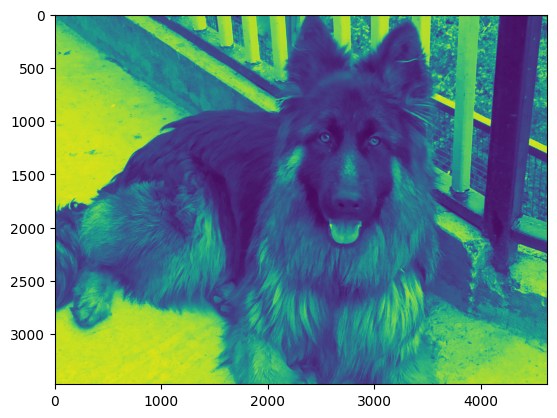

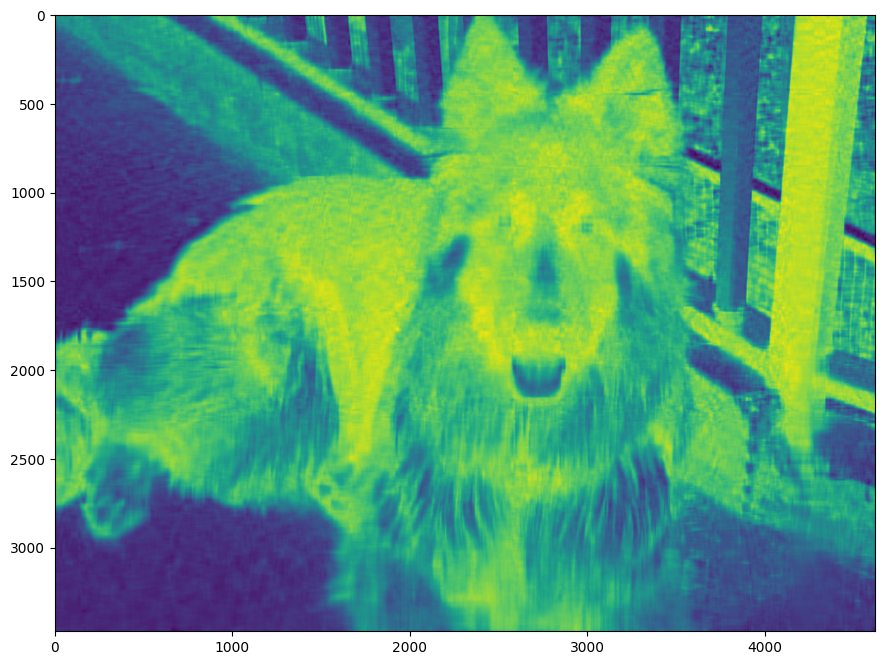

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2


img = Image.open("dog.jpg").convert('L')
plt.imshow(img)

imgArr = np.array(img)
u, s, v = np.linalg.svd(imgArr)
k=50
uk = u[:, :k]
sk = s[:k]
vk = v[:k, :]


h, w = imgArr.shape
size = img.size
size = size[0]*size[1]

compSize = k*(h+w+k)
svdComp = size/compSize
# print(size, svdComp)


imgCompressed = np.dot(uk, np.dot(np.diag(sk), vk))
compRatioSVD = (k*(imgArr.shape[0] + imgArr.shape[1] + k))/(imgArr.shape[0]*imgArr.shape[1])
# imgCompressed = Image.fromarray(imgCompressed.astype('uint8'), 'L')
# plt.imshow(imgCompressed)

# low_rank = np.dot(uk, np.dot(np.diag(sk), vk))
plt.figure(figsize=(16, 8))
plt.imshow(imgCompressed)
cv2.imwrite("dogSVD.jpg", imgCompressed)

# cv2.imwrite("dogSVD.jpg", imgCompressed)

print("Compression ratio:", svdComp)

In [36]:

img = cv2.imread('dog.jpg')
# plt.imshow(img)

red,green,blue = cv2.split(img)



Compression ratio: 0.025369789756509813


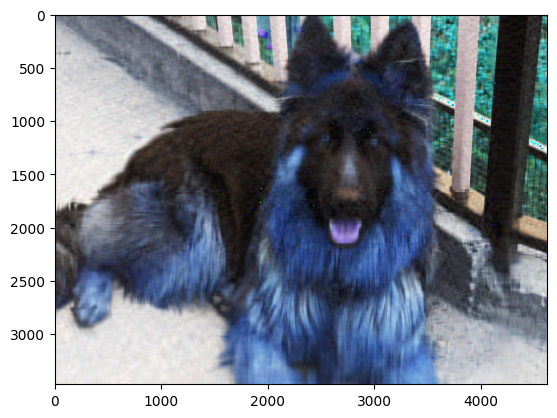

In [37]:
from sklearn.decomposition import PCA

# k = 50
pca = PCA(k)


redMatrix  =pca.fit_transform(red)
invMatrixRed = pca.inverse_transform(redMatrix)


greenMatrix=pca.fit_transform(green)
invMatrixGreen = pca.inverse_transform(greenMatrix)


blueMatrix=pca.fit_transform(blue)
invMatrixBlue = pca.inverse_transform(blueMatrix)




img2 = (np.dstack((invMatrixRed,invMatrixGreen,invMatrixBlue))).astype(np.uint8)
# plt.imshow(img2)
img2 = np.zeros_like(img)
img2[:,:,0] = invMatrixRed
img2[:,:,1] = invMatrixGreen
img2[:,:,2] = invMatrixBlue

cv2.imwrite('compressed.jpg',img2)

plt.imshow(img2)

compression_ratio = (k*(img2.shape[0] + img2.shape[1] + k))/(img2.shape[0]*img2.shape[1])
print("Compression ratio:", compression_ratio)


In [16]:
print("SVD compression ratio:", svdComp)
print("PCA compression ratio:", compression_ratio)

SVD compression ratio: 9.562317475270843
PCA compression ratio: 0.10457715952080707


In [29]:
import os
print(os.stat("compressed.jpg").st_size)
print(os.stat("img.jpg").st_size)

print("ratio", os.stat("img.jpg").st_size/os.stat("compressed.jpg").st_size)

253585
55143
ratio 0.21745371374489816
